# **Graficar con Pandas**
---
![](assets\viz_pandas.png)

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df.set_index("Country", inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df.shape

(195, 38)

In [5]:
years = list(map(str, range(1980, 2014)))

## **Area plots**
---

In [6]:
df.sort_values(by="Total", ascending=False, axis=0, inplace=True)

df_top5 = df.head()

df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


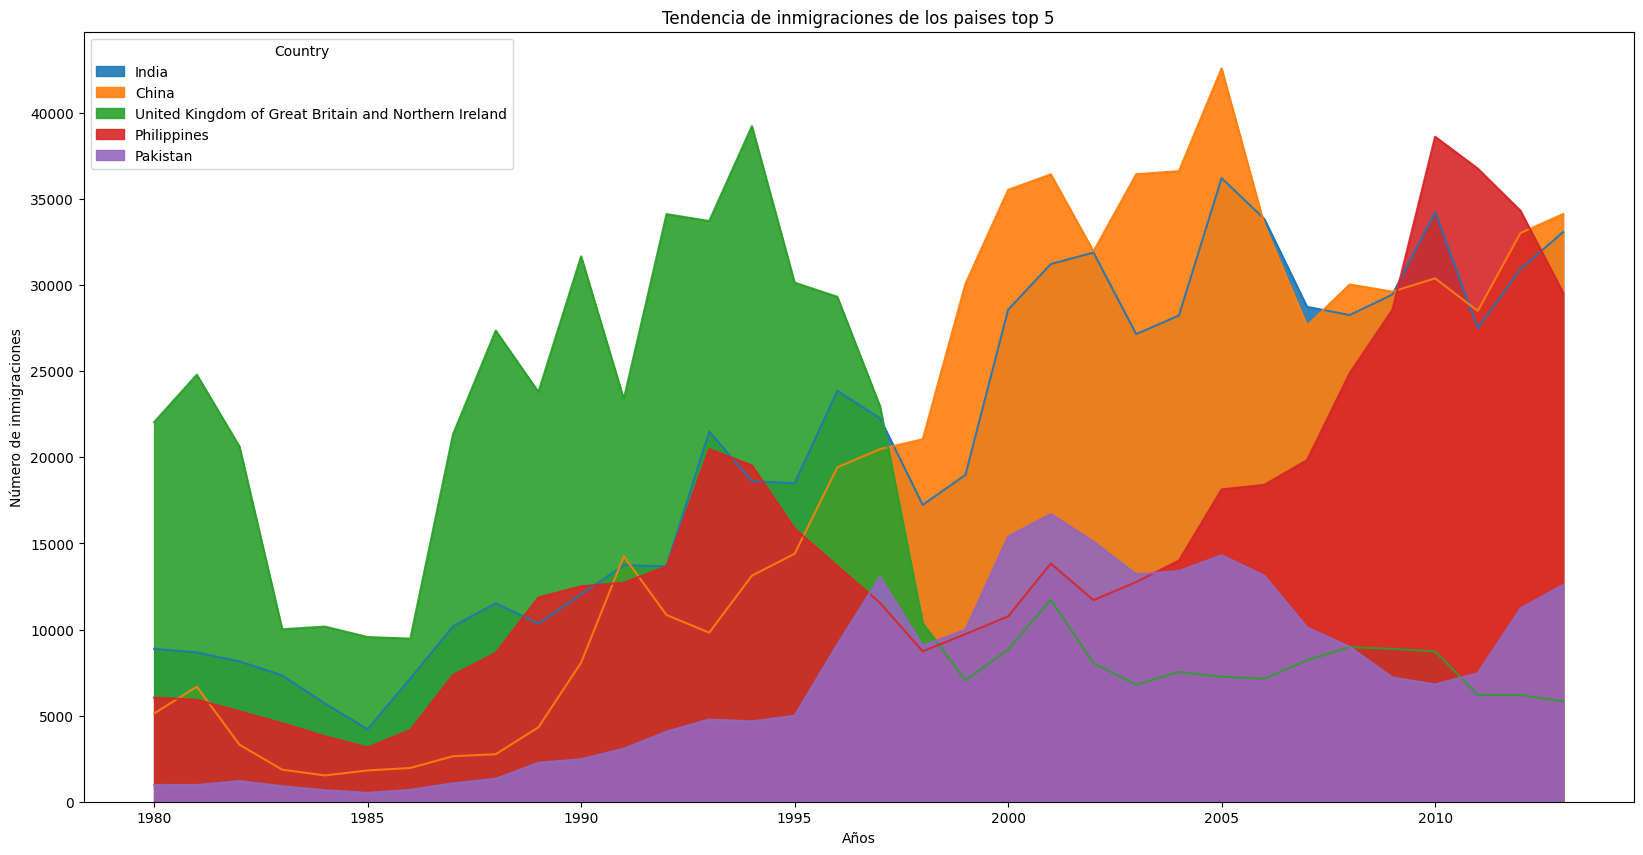

In [7]:
df_top5.index = df_top5.index.map(int)

df_top5.plot(kind='area',
            alpha=0.9,
            stacked=False,
            figsize=(20,10))

plt.title("Tendencia de inmigraciones de los paises top 5")
plt.ylabel("Número de inmigraciones")
plt.xlabel("Años")

plt.show()

# **Formas de graficar**

* **1. Scripting layer**
  - Se emplea plt. Ejemplo: `plt.title(...), plt.xlabel(...)`
* **2. Artist layer (Orientado a objetos)**
  - Se emplean Axes. Ejemplo: `ax.set_title()` en lugar de `plt.title()`.

Text(0.5, 0, 'Años')

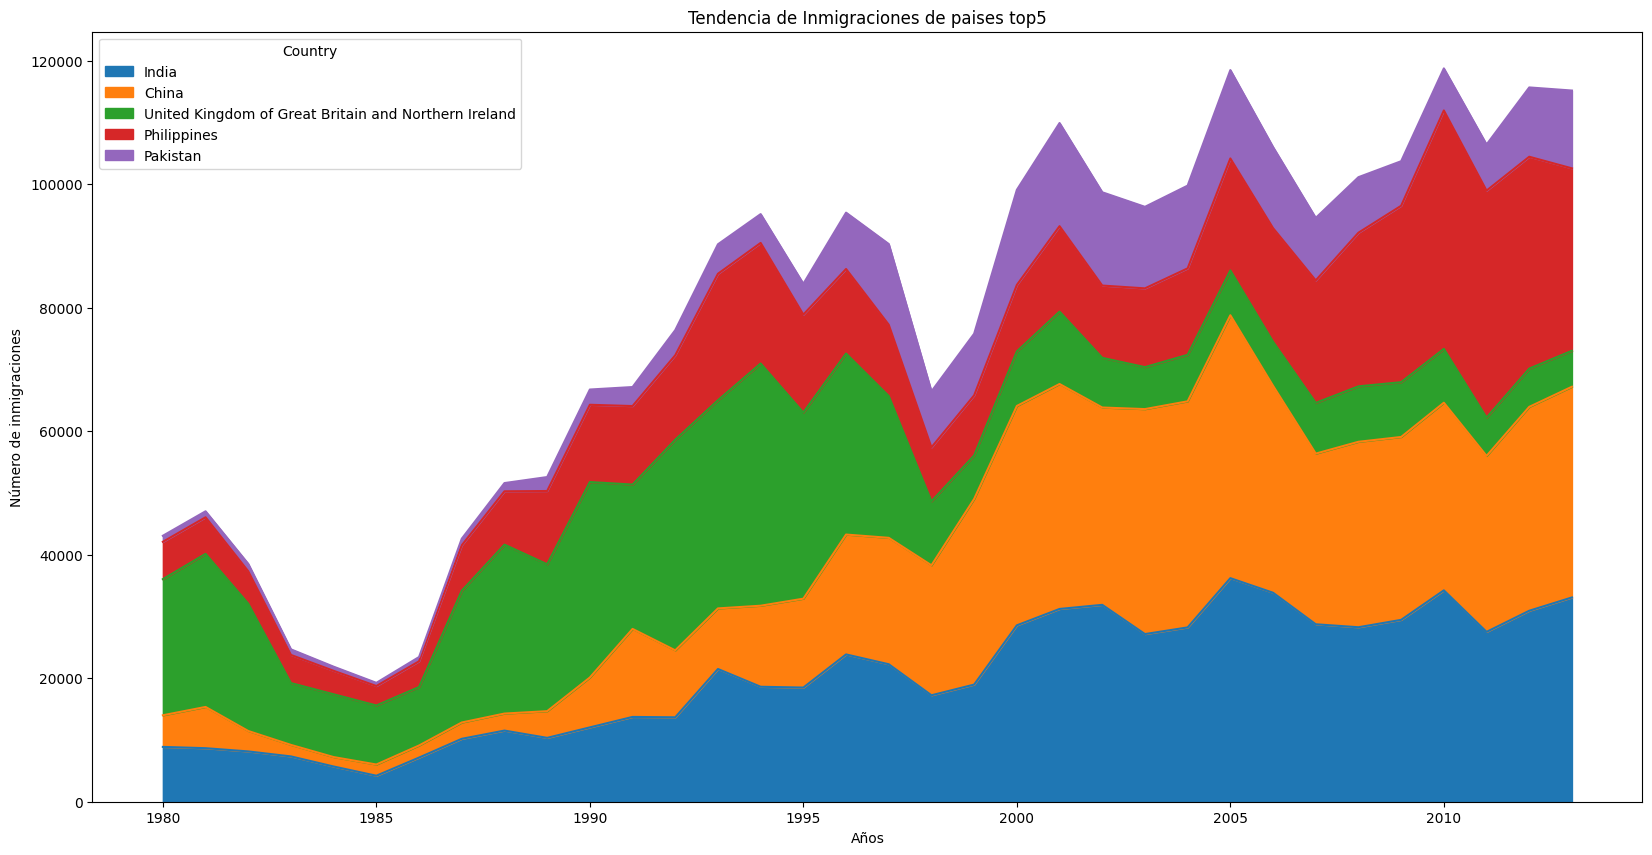

In [8]:
ax = df_top5.plot(kind='area', figsize=(20,10))

ax.set_title("Tendencia de Inmigraciones de paises top5")
ax.set_ylabel("Número de inmigraciones")
ax.set_xlabel("Años")

In [9]:
df_least5 = df.sort_values(by="Total", axis=0)
df_least5 = df_least5.head()
df_least5.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5


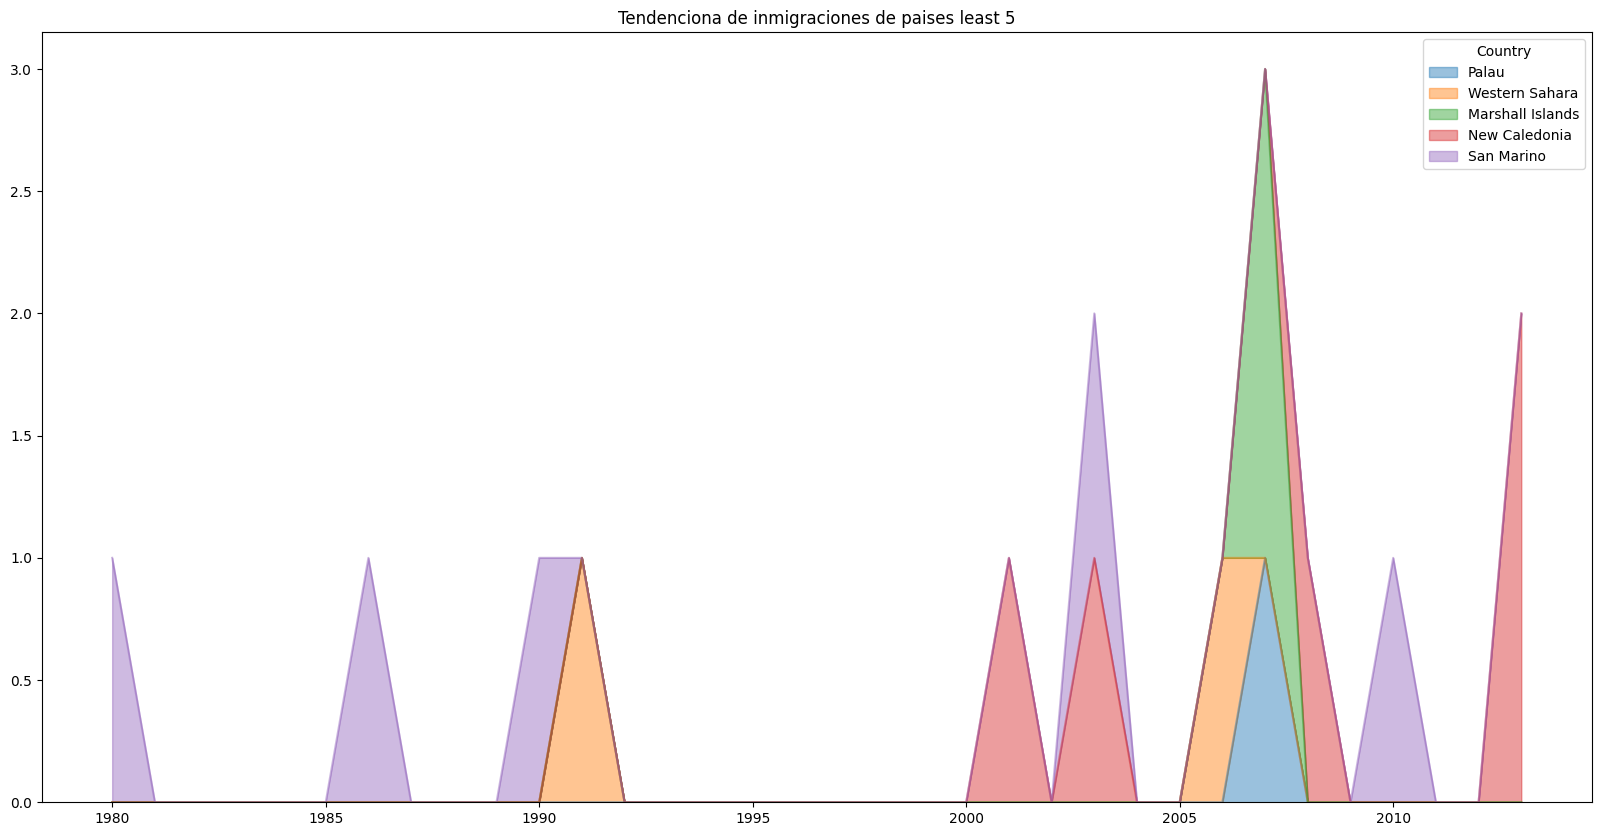

In [10]:
df_least5 = df_least5[years].transpose() 

df_least5.plot(kind="area", alpha=0.45, figsize=(20,10))
plt.title("Tendenciona de inmigraciones de paises least 5")
plt.show()

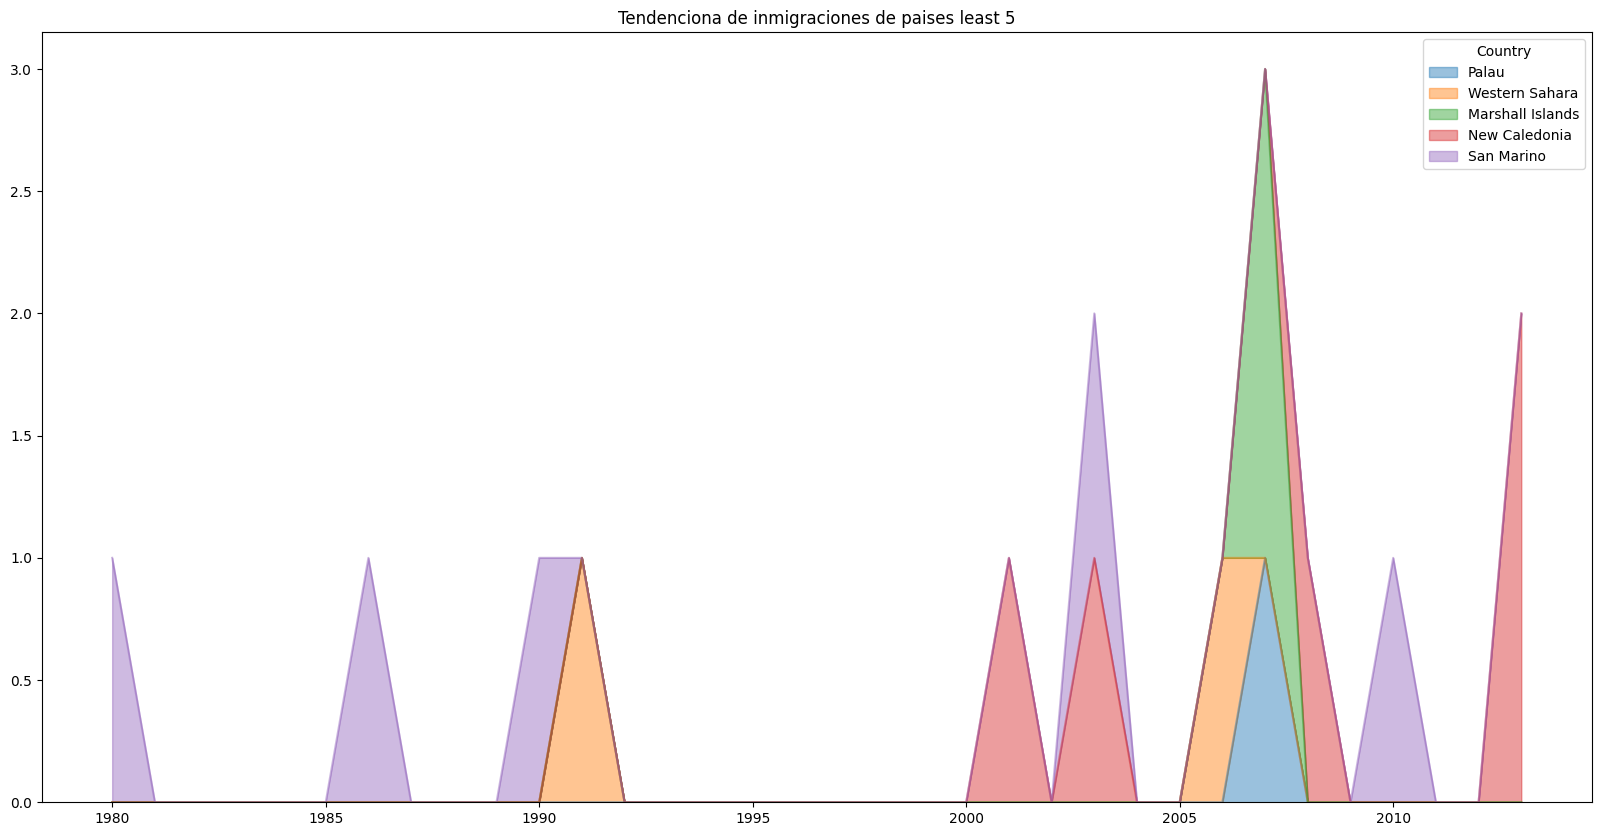

In [11]:
ax = df_least5.plot(kind="area", alpha=0.45, figsize=(20,10))
ax.set_title("Tendenciona de inmigraciones de paises least 5")
plt.show()

## **Histogramas**
---

In [12]:
df["2013"].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [15]:
count, bin_edges = np.histogram(df["2013"])

print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


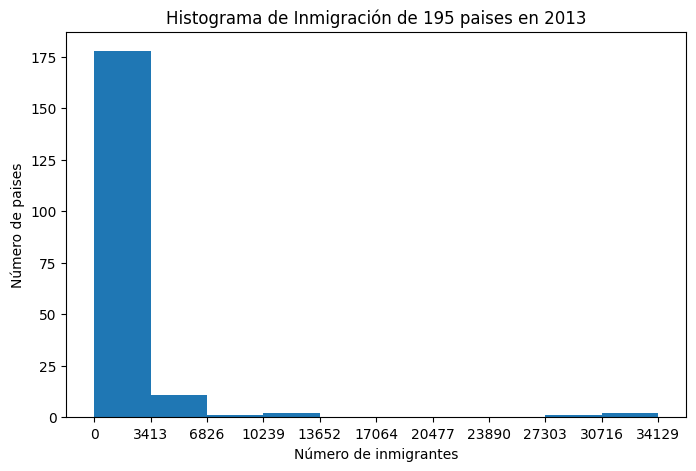

In [19]:
df["2013"].plot(kind="hist", figsize=(8,5), xticks=bin_edges)

plt.title("Histograma de Inmigración de 195 paises en 2013")

plt.ylabel("Número de paises")

plt.xlabel("Número de inmigrantes")

plt.show()

In [20]:
df.loc[["Denmark", "Norway", "Sweden"], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<Axes: ylabel='Frequency'>

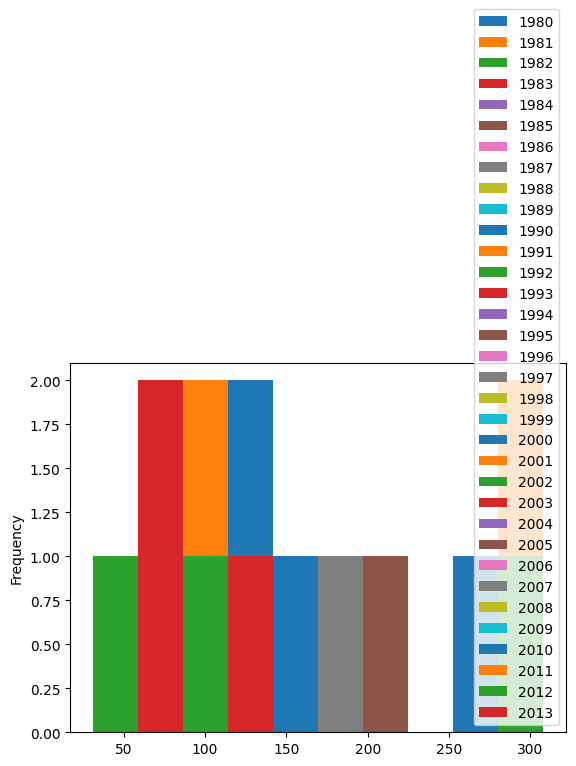

In [21]:
df.loc[["Denmark", "Norway", "Sweden"], years].plot.hist()

Text(0.5, 0, 'Número de inmigrantes')

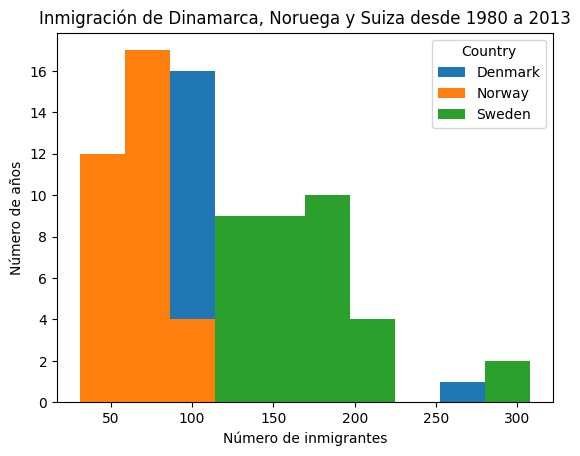

In [26]:
df.loc[["Denmark", "Norway", "Sweden"], years].transpose().plot.hist()
plt.title("Inmigración de Dinamarca, Noruega y Suiza desde 1980 a 2013")
plt.ylabel("Número de años")
plt.xlabel("Número de inmigrantes")

In [27]:
df_t = df.loc[["Denmark", "Norway", "Sweden"], years].transpose()

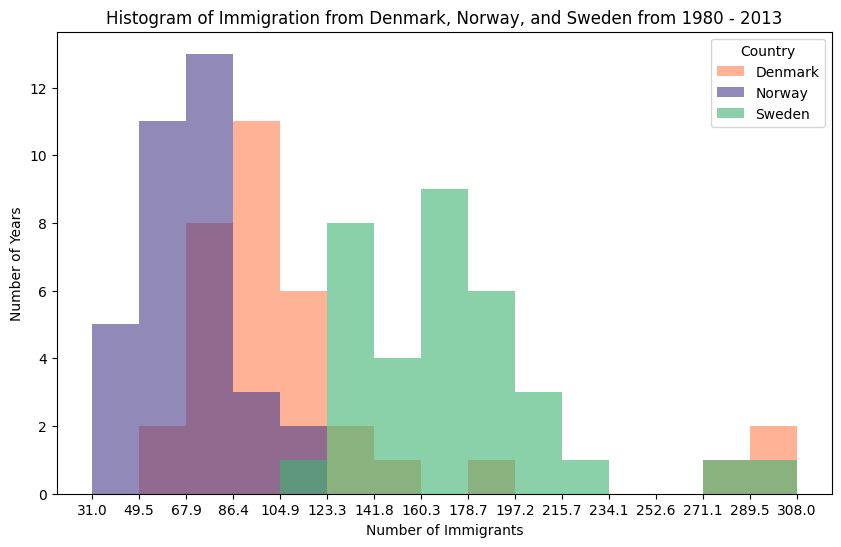

In [32]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [34]:
df_t = df.loc[["Greece", "Albania", "Bulgaria"], years].transpose()

In [35]:
count, bin_edges = np.histogram(df_t, 15)
count, bin_edges

(array([37,  9,  4,  6, 13,  9,  5,  5,  3,  3,  2,  3,  1,  1,  1],
       dtype=int64),
 array([   0. ,  134.8,  269.6,  404.4,  539.2,  674. ,  808.8,  943.6,
        1078.4, 1213.2, 1348. , 1482.8, 1617.6, 1752.4, 1887.2, 2022. ]))

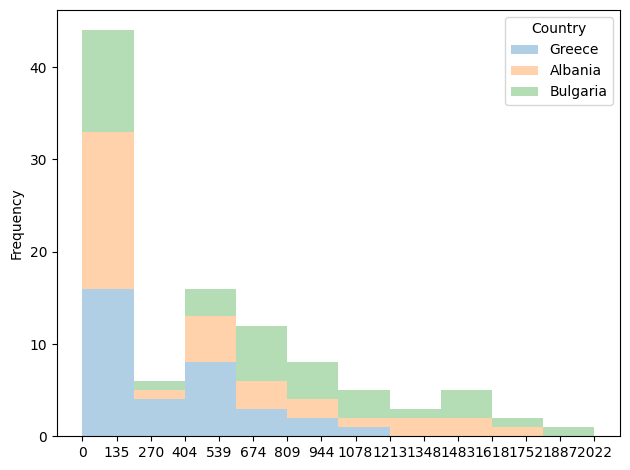

In [39]:
df_t.plot(kind="hist",
            stacked=True,
            xticks=bin_edges,
             alpha=0.35)
plt.tight_layout()
plt.show()

# **Bar charts**
---


In [40]:
df_iceland = df.loc["Iceland", years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

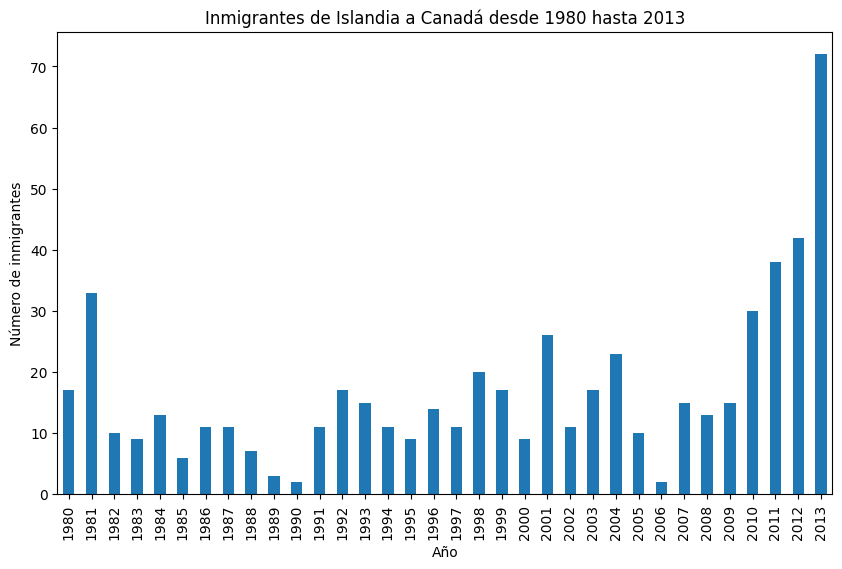

In [51]:
df_iceland.plot(kind="bar", figsize=(10,6))

plt.xlabel("Año")
plt.ylabel("Número de inmigrantes")
plt.title("Inmigrantes de Islandia a Canadá desde 1980 hasta 2013")
plt.show()

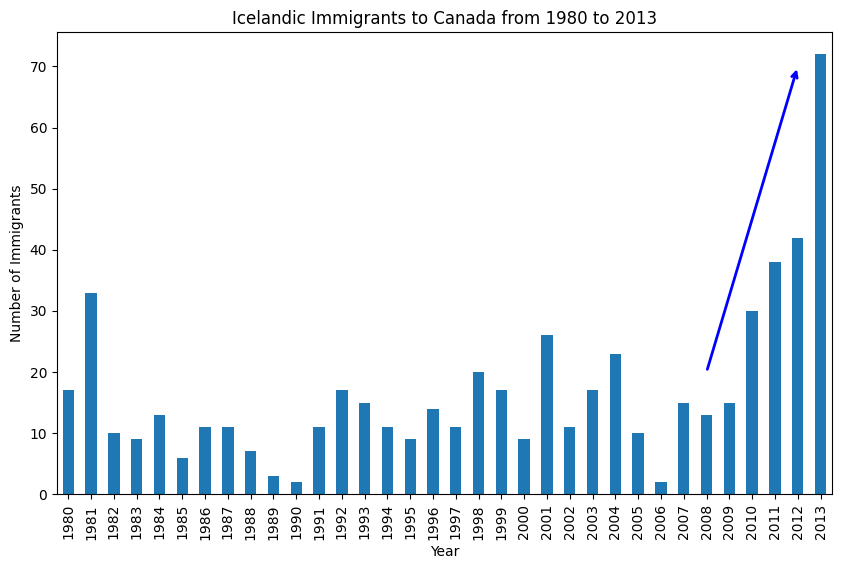

In [52]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

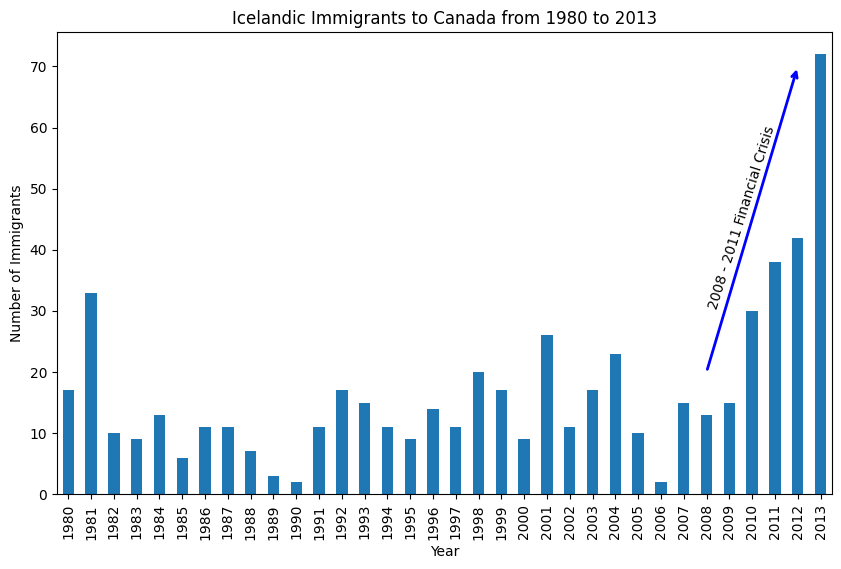

In [53]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

In [63]:
top15 = df.sort_values(by="Total", ascending=False)["Total"]
top15 = top15.head(15)

<Axes: xlabel='Country'>

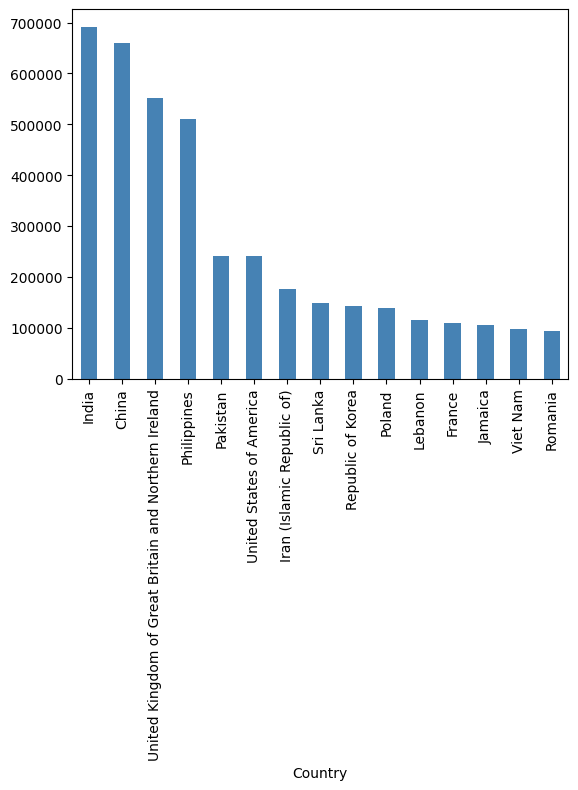

In [72]:
top15.plot(kind="bar", color="steelblue")